In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-predictions-personal/Churn_Predictions.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('/kaggle/input/churn-predictions-personal/Churn_Predictions.csv')

In [6]:
df.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
## Feature and Label
X = df.iloc[:,3:-2]
y = df.iloc[:,-1]

In [9]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          10000 non-null  int64  
 5   Balance         10000 non-null  float64
 6   NumOfProducts   10000 non-null  int64  
 7   HasCrCard       10000 non-null  int64  
 8   IsActiveMember  10000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 703.2+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [10]:
X.nunique()

CreditScore        460
Geography            3
Gender               2
Age                 70
Tenure              11
Balance           6382
NumOfProducts        4
HasCrCard            2
IsActiveMember       2
dtype: int64

In [11]:
Geography=pd.get_dummies(df['Geography'],drop_first=True).astype(int)
Gender = pd.get_dummies(df['Gender']).astype(int)

In [12]:
X= X.drop(['Geography','Gender'], axis=1)

In [13]:
df = pd.concat([X, Geography, Gender],axis=1)

In [14]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
SXtrain = scaler.fit_transform(X_train)
SXtest = scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

Initilize ANN

In [17]:
Classifier = Sequential() 

In [45]:
## Input layer
Classifier.add(Dense(units=11,activation='relu')) ## Adding the Dropout here
Classifier.add(Dropout(0.3))


In [19]:
## Adding the first hidden layer
Classifier.add(Dense(units=6, activation='relu'))

In [20]:
## Adding the Hidden Layer
Classifier.add(Dense(units=6, activation='relu'))

In [21]:
## Adding the Output Layer
Classifier.add(Dense(units=1, activation='sigmoid'))

In [22]:
Classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
## By deafult adam uses .01 learning rate
## We can also modify it
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

## Now instead of adam i can pass opt at classifer.compile(optimizer='opt')...... etc

In [24]:
## Early Stopping, when model accuracy will not increase then it will stop 
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False 
)

In [25]:
model_history = Classifier.fit(SXtrain, y_train, validation_split=0.33, epochs=1000, callbacks=early_stopping)


Epoch 1/1000
147/147 [==============================] - 7s 6ms/step - loss: 0.6478 - accuracy: 0.6306 - val_loss: 0.5157 - val_accuracy: 0.7901
Epoch 2/1000
147/147 [==============================] - 1s 5ms/step - loss: 0.4659 - accuracy: 0.7940 - val_loss: 0.4566 - val_accuracy: 0.7893
Epoch 3/1000
147/147 [==============================] - 1s 5ms/step - loss: 0.4446 - accuracy: 0.7946 - val_loss: 0.4464 - val_accuracy: 0.7923
Epoch 4/1000
147/147 [==============================] - 1s 7ms/step - loss: 0.4292 - accuracy: 0.8044 - val_loss: 0.4331 - val_accuracy: 0.8170
Epoch 5/1000
147/147 [==============================] - 1s 6ms/step - loss: 0.4130 - accuracy: 0.8275 - val_loss: 0.4183 - val_accuracy: 0.8299
Epoch 6/1000
147/147 [==============================] - 1s 5ms/step - loss: 0.3973 - accuracy: 0.8371 - val_loss: 0.4129 - val_accuracy: 0.8325
Epoch 7/1000
147/147 [==============================] - 1s 5ms/step - loss: 0.3867 - accuracy: 0.8394 - val_loss: 0.3990 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

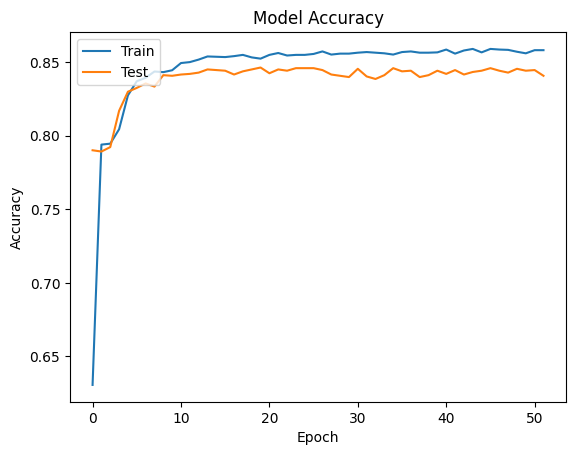

In [30]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

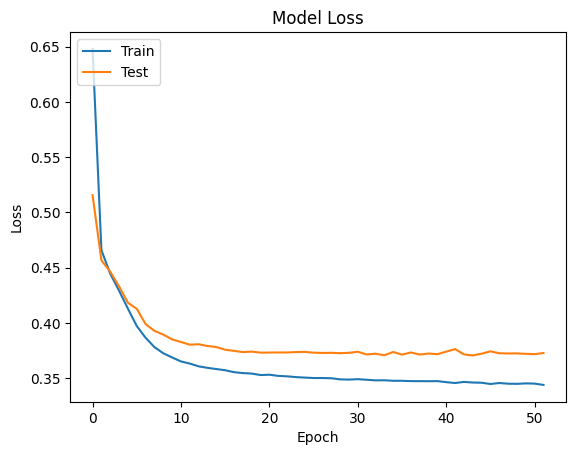

In [31]:
# Summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
## Making the Predictions and evaluating the mdel

# Predicting the Test set results
y_pred = Classifier.predict(SXtest)
y_pred = (y_pred >= 0.5)

94/94 [==============================] - 0s 2ms/step


In [35]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2344,   72],
       [ 345,  239]])

In [39]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [40]:
score

0.861

In [42]:
## Get the Weights and also we can store weights in pickle file
Classifier.get_weights()

[array([[ 0.18337962, -0.5396537 , -0.08863041, -0.23554102,  0.12086627,
          0.29326338,  0.10484152, -0.02853268,  0.0711256 ,  0.2424386 ,
          0.14101368],
        [-0.63957125, -0.6323939 ,  0.27277878,  0.17013264,  0.12055314,
          0.73268193, -0.34141076,  0.16107742, -0.83576345,  0.44925925,
          0.09906037],
        [ 0.2476435 , -0.13050976,  0.45874178, -0.08617342,  0.32085586,
          0.2645429 ,  0.31087726, -0.07001172, -0.2724524 , -0.0967135 ,
         -0.37878877],
        [ 0.45338622, -0.13554014, -0.23713768,  0.17380765, -0.39390936,
         -0.16003639, -0.3281838 ,  0.20919031, -0.44385794, -0.1423059 ,
         -0.55464476],
        [-0.3736793 ,  0.7729709 ,  0.44955394, -0.37734455, -0.8106478 ,
         -0.261816  , -0.21149997,  0.85601145,  0.07164792,  0.78703105,
          0.20874698],
        [ 0.18424895,  0.11462227,  0.33358324,  0.2818552 ,  0.02027055,
         -0.28293675, -0.18794204, -0.06188085, -0.16700701, -0.2037796